# **TP 4 : Transformées de Fourier - Application à l'évolution d'un système quantique**


## Consignes pour les comptes-rendus (Date d'échéance au plus tard:  <span style="color:red;font-weight:bold;font-size:100%">Vendredi 12 décembre 2024</span> )
<div style="color: black; background-color: yellow; font-size: 16px; padding: 5px;">


Pour les comptes-rendus, deux possibilités au choix: 
- Comptes-rendus sous format d'un notebook (Jupyter)
- Comptes-rendus sous format pdf (LaTeX)

**Compte-rendu sous format d'un notebook:**
pour des comptes-rendus sous format d'un notebook, vous pouvez réaliser directement tout le compte-rendu sur ce notebook. Il devra inclure d'une part des blocs de programmes (en python: "`Code`") qui réalisent les différents exercices proposés, et des blocs de texte (en langage "`Markdown`") dans lequel vous analyserez et discuterez les résultats.


**Compte-rendu sous format pdf (LaTeX):**
vous pouvez également rendre les comptes-rendus sous forme d'un fichier .pdf réalisé en LaTex, à partir de résultats obtenus par les simulations en python. Il devra par exemple inclure des figures obenues par les différents programmes qui réalisent les différents exercices proposés. Dans le compte-rendu, il faudra également analyser et discuter ces résultats. Pensez à joindre les codes des programmes avec le compte-rendu.

**Instructions pour les codes:** 
pour les codes, pensez dans la mesure du possible, à mettre des commentaires (précédés du caractère #) expliquant par exemple ce que fait le code à un endroit donné, ou ce que représentent des variables. Plus un code est propre et bien commenté, plus il est facile à lire.
</div>

# **A - Fonctionalités utiles pour ce TP**

## Animer des données
Il sera nécéssaire d'animer certains résultats. Pour cel`a vous pourrez utiliser des fonctions telles que celle définie ci-dessous.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def animer_donnees(donnees, x_donnees, fonction_y, labels, params_tracés=None):
    """
    Anime des données évoluant dans le temps (par exemple, une fonction d'onde ou toute autre donnée)
    
    Paramètres :
    - donnees : Liste ou tableau d'ensembles de données 1D évoluant dans le temps.
    - x_donnees : Les valeurs x pour les graphiques (par exemple, une grille spatiale ou de moment).
    - fonction_y : Une fonction qui prend un indice temporel et retourne les valeurs y (données à tracer).
    - labels : Liste des étiquettes pour le graphique, par exemple ['Donnée', 'Potentiel'].
    - params_tracés : Dictionnaire contenant des paramètres optionnels comme les limites des axes, couleurs, etc.
    
    Retourne :
    - anim : Objet d'animation Matplotlib.
    """
    
    # Définir les paramètres par défaut
    if params_tracés is None:
        params_tracés = {'xlim': [x_donnees[0], x_donnees[-1]], 'ylim': [-0.1, 1.2], 'intervalle': 50}
    
    # Créer la figure et les axes
    fig, ax = plt.subplots()
    
    # Initialiser le graphique avec la première image des données
    ligne, = ax.plot(x_donnees, fonction_y(0), label=labels[0], color='b')
    
    # Définir les limites des axes, les étiquettes, etc.
    ax.set_xlim(params_tracés['xlim'])
    ax.set_ylim(params_tracés['ylim'])
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1] if len(labels) > 1 else '')
    ax.legend()

    # Fonction de mise à jour pour l'animation
    def mettre_a_jour(frame):
        donnees_y = fonction_y(frame)
        ligne.set_ydata(donnees_y)
        return ligne,

    # Créer l'animation
    anim = animation.FuncAnimation(fig, mettre_a_jour, frames=np.arange(len(donnees)), interval=params_tracés['intervalle'])
    
    return anim

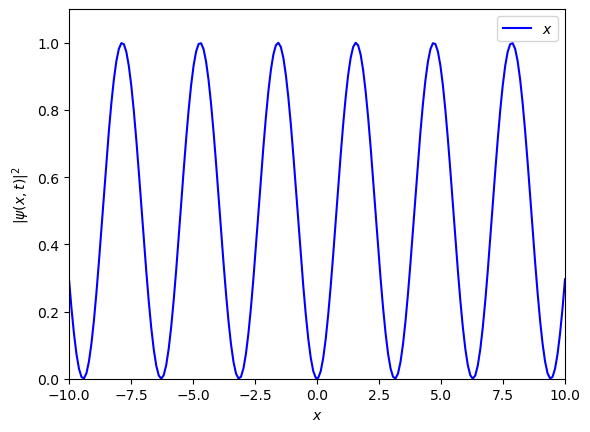

In [ ]:
### Exemple d'usage 

#  Exemple de données évolutives (fonction d'onde à différents instants)
xx = np.linspace(-10,10,200)
psi_of_t = [np.sin(xx - 0.1*t) for t in range(100)]

# Exemple de fonction pour extraire les valeurs y (par exemple, le carré de l'amplitude de la fonction d'onde)
def fonction_y(t_index):
    return np.abs(psi_of_t[t_index])**2

# Définir les étiquettes des axes
labels = [r'$x$', r'$|\psi(x,t)|^2$']

# Paramètres du graphique (optionnels)
params_tracés = {'xlim': [xx[0], xx[-1]], 'ylim': [0, 1.1], 'intervalle': 50}

# Appeler la fonction d'animation
anim = animer_donnees(psi_of_t, xx, fonction_y, labels, params_tracés)

# Afficher l'animation
#plt.show()
HTML(anim.to_jshtml())

<div class="alert alert-block alert-success">
    <b> </b> 

# **B - Pratique et implémentation de la Transformée de Fourier**

On a vu dans le cours que la **transformation de Fourier continue** d'une fonction $f(x)$ et la **transformation de Fourier inverse** sont définies par (avec la normalisation symétrique):
\begin{align}
\hat{f}(k) &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} f(x) \, e^{-i k x} \, dx \\
f(x) &= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} \hat{f}(k) \, e^{i k x} \, dk
\end{align}

### Matrices de la Transformation de Fourier Discrète


Pour un signal discret, $\psi$ est un vecteur de taille $N$. La TFD discrète et son inverse peuvent alors être écrite sous forme de produit matriciel :
$$
\hat{\psi} = \mathbf{F} \cdot \psi\,, \qquad \text{et}\qquad 
\psi = \mathbf{F}^{-1} \cdot \hat{\psi}\,.
$$
Ici, la matrice $\mathbf{F}$ applique la transformation de Fourier en calculant des combinaisons linéaires pondérées par les exponentielles complexes.


On peut écrire la transformée de Fourier discrète en utilisant des matrices, nous pouvons introduire une **matrice de Fourier discrète** $\mathbf{F}$, et la **matrice de transformation inverse** $\mathbf{F}^{-1}$ qui permet de revenir du domaine fréquentiel au domaine spatial. Elles sont respectivement définies par :
\begin{align}
  \mathbf{F}[m, n]      &= \delta_x \cdot \frac{1}{\sqrt{2\pi}} \cdot e^{-i k_{m} x_{n}} \\
  \mathbf{F}^{-1}[n, m] &= \delta_k \cdot \frac{1}{\sqrt{2\pi}} \cdot e^{i k_{m} x_{n}}
\end{align}
où :
- $m$ est l'indice de la fréquence (ligne de la matrice),
- $n$ est l'indice spatial (colonne de la matrice).
Ici `delta_x` et `delta_k` sont introduits pour tenir compte de l'espacement entre les points de la grille dans le domaine spatial et fréquentiel.





## B1 Execrice Transformée de Fourier discrète

### B.1.a Discrétisation de l’espace et du moment avec les transformées de Fourier

Il faut avant tout créer une grille d’espace et une grille de moment qui seront utilisées pour représenter numériquement la fonction d’onde. Afin de passer d’une représentation spatiale à une représentation dans l’espace des impulisons, nous utiliserons la transformée de Fourier discrète (DFT) pour relier ces deux grilles.

On choisira l’intervalle spatial $x\in [-10,10]$ découpée en $N$ points (par exemple $N = 2^9 + 1$).
- Calculez le pas de la grille, `delta_x` et construisez le tableau `x_grid` en utilisant `delta_x` pour obtenir une grille uniforme de points sur l'intervalle.
- Calculez la valeur minimale du moment $p$  et le pas `delta_k` avec les relations :
  $$
  p_0 = -\frac{\pi}{\delta_x} \times \left(1 - \frac{1}{N}\right)
  \qquad  \text{et} \quad \delta_p = \frac{2 \pi}{N \times \delta_x}
  $$
Utilisez `p0` et `delta_p` pour créer la grille `p_grid_dft`, en prenant soin que cette grille soit réciproque à `x_grid`. 

-1.2723450247038663
[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]
[-1.27234502 -0.98960169 -0.70685835 -0.42411501 -0.14137167  0.14137167
  0.42411501  0.70685835  0.98960169  1.27234502]


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

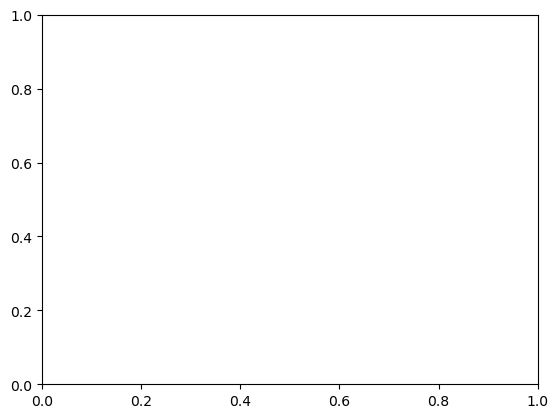

In [36]:
### BEGIN SOLUTION

# constantes
N=10
x_min=-10
x_max=10

#grille
delta_x=(np.abs(x_min)+np.abs(x_max))/(N-1)
x_grid=np.linspace(-10,10,N)

delta_p=2*np.pi/(N*delta_x)
p0=-np.pi/delta_x*(1-1/N)
#p_grid=np.zeros(N)
p_grid = np.linspace(p0, p0 + (N - 1) * delta_p, N)
print(p0)
print(x_grid)
print(p_grid)


# fonction p
p=p0

"""
for i in range (0,N):
    p_grid[i]=p
    p+=delta_p
    """
"""
print(p0)
print(x_grid)
print(p_grid)
"""


#  Exemple de données évolutives (fonction d'onde à différents instants)


# Exemple de fonction pour extraire les valeurs y (par exemple, le carré de l'amplitude de la fonction d'onde)
def fonction_y(t_index):
    return (p_grid[t_index])

# Définir les étiquettes des axes
labels = [r'$x$', r'$|\psi(x,t)|^2$']

# Paramètres du graphique (optionnels)
params_tracés = {'xlim': [x_grid[0], x_grid[-1]], 'ylim': [p_grid[0], p_grid[-1]], 'intervalle': N}

# Appeler la fonction d'animation
anim = animer_donnees(p_grid, x_grid, fonction_y, labels, params_tracés)

# Afficher l'animation
plt.show()
#HTML(anim.to_jshtml())

### END SOLUTION

### B.1.b Implémentation des transformées de Fourier

Comme décrit plus haut, il faut ici, précalculer les matrices pour les transformées de Fourier.

In [4]:
### BEGIN SOLUTION

### END SOLUTION

### B.1.c Verification de certaines transformées de Fourier

Afin de vérifier que votre implémentation de la transformée de  Fourier discète est correcte, vérifiez et tracez des transformées de Fourier de fonctions dont le résulta est déjà connu: 
* d'une fonction sinusoidale
* d'une gaussienne 
* d'une fonction carrée 

In [5]:
### BEGIN SOLUTION

### END SOLUTION


<div class="alert alert-block alert-info">
  
    
</div>


# **C - Évolution d'un système quantique**

# C1 - Outils théoriques pour la résolution de l'équation de Schrödinger dépendant du temps

Nous avons vu dans le cours, et dans l'exercice précédent comment implémenter des transformées de Fourier. Le but ici est de mettre en application pour traiter des problèmes quantiques.  
En particulier, dans cette session de TP, nous examinons le problème de la détermination de l'évolution temporelle d'une fonction d'onde $\psi(t)$ qui part d'un état initial $\psi_0$ à l'instant $t=0$, et évolue selon l'équation de Schrödinger
$$ i\frac{\partial \psi(t)}{\partial t} = H \psi(t) \quad (\text{avec } \hbar = 1) \,.$$

On considère ici une particule de masse $m$, d'impulsion $p$ et de position $x$, se déplaçant dans un potentiel unidimensionnel $V(x)$. Sa fonction d'onde $\psi(x, t)$ évolue selon l'équation de Schrödinger avec un hamiltonien 
$$ H = \frac{1}{2}p^2 + V(x) \,.$$

où $ p^2 $ a la représentation suivante dans l'espace direct :

$$ p^2 = -\frac{\partial^2}{\partial x^2}. $$

Nous rapellons ici la méthode présentée dans le cours pour aborder ce problème en utilisant l'opérateur d'évolution. 

#### <u>Remarque</u>:
Remarquons avant tout qu'une méthode naïve pour la discrétisation du temps, pour résoudre l'évolution de Schrödinger, serai de remplacer la dérivée temporelle par une approximation du premier ordre
$$ i\frac{\partial \psi(t)}{\partial t} \simeq \frac{\psi(t + \Delta t) - \psi(t)}{\Delta t}\,. $$
Une telle approche, similaire à ce qui est vue dans des cours de résolution numérique des équation différentielle, est simple à mettre en œuvre. Cependant elle soulève plusieurs problèmes, entre autre qu'il est difficile d'assurer la conservation de la probabilité. On utilisera donc ici une autre méthode, parfois qualifiée de: time-evolving block decimation.

## C1.1 L'opérateur d'évolution temporellee et formule de Trotter-Susuzki

Il est préférable de partir de la solution opératoire de l'équation de Schrödinger (cette formulation sera détaillée au second semestre)
$$ \psi(t) = \exp(-itH) \psi(0) \,.$$
L'idée ici est de décomposer l'intervalle de temps $t$ en $N$ étapes de durée $\Delta t = \frac{t}{N}$. L'opérateur d'évolution complet peut alors être écrit (sans approximation) comme un produit de $N$ opérateurs
$$
\exp(-itH) = \prod_{k=1}^{N} \exp(-i \Delta t H) \,.
$$
Chaque opérateur infinitésimal d'évolution s'écrit alors
$$
\exp(-i \Delta t H) = \exp\left[-i \Delta t \left(\frac{p^2}{2} + V(x)\right)\right]\,.
$$

### C1.1.a Décomposition de Trotter-Susuzki
Dans cette expression, la partie du potentiel $V(x)$ prend une forme simple dans l'espace réel, tandis que la partie dérivée $p^2$ prend une forme simple dans l'espace des impulsions (c’est-à-dire après une transformation de Fourier de la coordonnée spatiale). Pour séparer ces deux contributions, nous utilisons la formule de Trotter-Susuki :
$$
\exp\left[-i \Delta t \left(\frac{p^2}{2} + V(x)\right)\right] \simeq \exp\left(-i V(x) \frac{\Delta t}{2}\right) \exp\left(-i \frac{\Delta t p^2}{2}\right) \exp\left(-i V(x) \frac{\Delta t}{2}\right) + \mathcal{O}(\Delta t^3).
$$

### C1.1.b Espaces des position et espace des impulsions: Transformation de Fourier

Comme dit plus haut, la décomposition de Trotter permet de séparer l'opérateur d'évolution en un produit d'opérateurs agissant sur des variables différentes. La partie cinétique 
est une simple  multiplication par un exponentielles dans l'espace des impulsion (sur $\psi(p)$). De même, la partie potentielle agit comme une simple  multiplication par un exponentielles dans l'espace des positions (sur $\psi(x)$).

Dans un espace continu, les transformations de Fourier permettent de passer de l'espace des positions à l'espace des impulsion. Autrement dit elles relient $\psi(x)$ et $\psi(p)$ d'après les formules
$$
  \psi(p) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} dx \, e^{-ipx} \psi(x)
$$
$$
  \psi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} dp \, e^{ipx} \psi(p)
$$

### C1.1.c Discrétisation

La fonction d'onde $\psi(x, t)$, continue dans l'espace et le temps, doit être discrétisée pour un traitement numérique. On la représente par un tableau de valeurs aux points spécifiques de l'espace, chaque point stockant l'amplitude de $\psi$ à un instant donné. Cette discrétisation simplifie les calculs et l'application d'opérateurs d'évolution, comme dans la formule de Trotter, et permet d'utiliser des fonctions de bibliothèque pour la transformée de Fourier discrète (DFT) directement sur ce tableau. 

Remarquons que la transformée de Fourier discrète (DFT) suppose des données périodiques sur l'intervalle spatial discrétisé, connectant ainsi les valeurs de $\psi$ aux bords de l’intervalle pour former un système périodique. Cela revient à simuler un espace où la fonction d'onde "boucle" continuellement, créant une condition aux limites artificielle : toute particule traversant un bord spatial réapparaît de l'autre côté, et le potentiel $V(x)$ devient également périodique, même si ce n'est pas le cas dans la situation physique d'origine. Cette hypothèse convient pour les systèmes à potentiel périodique, mais elle peut nécessiter d’autres approches si des conditions aux limites réelles sont requises.


### C1.1.d Présentation de l'algorithme


Dans l'algorithme, la coordonnée spatiale est également discrétisée et on utilise la transformée de Fourier discrète.  Un schéma possible pour l'algorithme est donc :

<div class="alert alert-block alert-info">

    
</div>

1. Partir d'une fonction d'onde initiale.
2. Discrétiser le temps $t$ en $ N $ étapes de durée $ \Delta t = \frac{t}{N} $.
3. À chaque étape de temps, appliquer la formule de Trotter en procédant ainsi :
   - dans l'espace réel, multiplier par $ e^{-i \Delta t V(x) / 2} $,
   - passer dans l'espace des moments et multiplier par $ e^{-i \Delta t p^2 / 2} $,
   - revenir dans l'espace réel et multiplier par $ e^{-i \Delta t V(x) / 2} $.





# C2 - Résolution numérique de l'équation de Schrödinger dépendant du temps

On considérera différents cas
* Propagation libre
* Barrière de potentielle: effet tunel
* Oscillateur harmonique 

Dans tous les cas, il le code en lui même ne changera pas. Seuls le potentiel $V(x)$ et les conditions initiales changeront. On guidera donc la résolution pour le cas simple de la propagation libre d'un paquet d'onde gaussien. Pour les autres problèmes, il suffira d'adapter le code aux détails du problème.


# C2.1 - Propagation libre

In [6]:
### Imports
import numpy as np
import matplotlib.pyplot as plt

### C2.1.a Discrétisation de l’espace et du moment avec les transformées de Fourier

Il faut avant tout créer une grille d’espace et une grille de moment qui seront utilisées pour représenter numériquement la fonction d’onde. Afin de passer d’une représentation spatiale à une représentation dans l’espace des impulisons, nous utiliserons la transformée de Fourier discrète (DFT) pour relier ces deux grilles.

On choisira l’intervalle spatial $x\in [-10,10]$ découpée en $N$ points (par exemple $N = 2^9 + 1$).
- Calculez le pas de la grille, `delta_x` et construisez le tableau `x_grid` en utilisant `delta_x` pour obtenir une grille uniforme de points sur l'intervalle.
- Calculez la valeur minimale du moment $p$  et le pas `delta_k` avec les relations :
  $$
  p_0 = -\frac{\pi}{\delta_x} \times \left(1 - \frac{1}{N}\right)
  \qquad  \text{et} \quad \delta_p = \frac{2 \pi}{N \times \delta_x}
  $$
Utilisez `p0` et `delta_p` pour créer la grille `p_grid_dft`, en prenant soin que cette grille soit réciproque à `x_grid`. 
- On pourra lternativement choisir une valeur de $p_0$ si nécéssaire, par exemple $p_0 = -18$.

In [7]:
### BEGIN SOLUTION

### END SOLUTION

### C2.1.b Implémentation des transformées de Fourier

Comme pour les premiers exercices, on précalcule les matrices pour les transformées de Fourier

In [8]:
### BEGIN SOLUTION

### END SOLUTION

### C2.1.c Paquet d'onde gaussien

Le paquet d'onde gaussien est la fonction centrée autour de $x_0$, avec une largeur contrôlée par un paramètre $\sigma$ et une impulsion initiale $p_0$.La formule de l'onde gaussienne est donnée par :
$$
\psi(x) = \sqrt{\frac{1}{\sqrt{2 \pi} \sigma}} \cdot \exp\left(-\frac{(x - x_0)^2}{2 \sigma^2} + i p_0 x\right)
$$
Cette fonction comporte deux parties :
- **La partie réelle (en gaussienne)**, qui contrôle la forme de la cloche centrée autour de $x_0$.
- **La partie imaginaire (en exponentielle complexe)**, qui introduit une oscillation dépendant de $p_0$, donnant un caractère ondulatoire à la fonction.

Écrire une fonction définit un paquet d'onde gaussien. Ici le  et repésenter cette fonction d'onde
- Créez une fonction `gaussian_wave(x_, x0_, sigma, p0_)` qui prend en entrée la grille de positions `x_` et les paramètres $x_0$, $\sigma$, et $p_0$. 
- Affichez les parties réelle,  imaginaire et le module du paquet d'onde en fonction de `x_grid`.
- Afficher également dans l'e'space des impulsions pour vérifier 

In [9]:
### BEGIN SOLUTION

### END SOLUTION

### C2.1.d Évolution

1. Écrire un fonction `time_step` qui fait évoluer la fonction d'onde d'un pas de temps `dt`. Par exemple de la forme:
```python
def time_step(psi_, potentiel_, x_, p_, dt):
    '''
        psi_       : tableau contenant la fonction d'onde
        potentiel_ : tableau contenant le potentiel
        x_         : tableau contenant les positions
        p_         : tableau contenant les impulsions
        dt         : le pas de temps
    '''

    ......

    return psi_
    
```


2. Écrire un fonction `time_evolution` qui fait évoluer la fonction d'onde d'un pas de temps `dt`. Par exemple de la forme:
```python
def time_step(psi0_, potentiel_, x_, p_, times):
    '''
        psi0_      : tableau contenant la fonction d'onde à l'instant initial
        potentiel_ : tableau contenant le potentiel
        x_         : tableau contenant les positions
        p_         : tableau contenant les impulsions
        times      : le tableau des temps
    '''

    ......

    return psi_
    
```


In [10]:
### BEGIN SOLUTION

### END SOLUTION

3. Écrire une fonction qui renvoie le potentiel. 
On pourrant prendre ici le potentiel nul.
4. Définir (si ce n'est déja fait) la condition initiale $\psi_0$ comme étant un paquet d'onde gaussien, puis faites le évoluer avec la fonction `time_evolution` en ayant au préalable défini les quantités nécessaires.

In [11]:
### BEGIN SOLUTION

### END SOLUTION

5. Afficher la fonction d'onde à certains temps

In [12]:
### BEGIN SOLUTION

### END SOLUTION

### C2.1.e Animation


Animez vos résultats, voir par exemple le code au début


In [13]:
### BEGIN SOLUTION


### END SOLUTION

# C2.2 - Barrière de potentielle: effet tunel

À l'aide de vos codes précédents étudiez l'effet tunnel. 
Pour celà il s'agira de définir un nouveau potentiel par exemple
```python
def barriere(x,a=0,b=0.5,height=40):

```

In [14]:
### BEGIN SOLUTION


### END SOLUTION


# C2.3 - Oscillateur harmonique 

De même que précédement, vous pouvez réutulizer vos codes précédents pour étudier l'oscillateur harmonique quantique. Comme précédement, il s'agira de définir un nouveau potentiel qui soit celui de l'oscilateur harmonique
$$
    V(x) = \frac{\omega^2x^2}{2} \,.
$$ 

1. Commencez par un paquet d'onde gaussien . Qu'observez vous?
2. Commencez par un état cohérent (état propre). Qu'observez vous?
3. Commentez


In [15]:
### BEGIN SOLUTION


### END SOLUTION

# C.4 - Améliorations du code et transformée de Fourier rapide (bonus)

Pour améliorer le code, vous pouvez de remplacer les transformées de Fourier par des transformée de Fourier rapide avec **`numpy.fft`**. Il s'agit d'une approche beaucoup plus simple et performante que de calculer manuellement les matrices de Fourier.

Au lieu de calculer manuellement les matrices, nous pouvons utiliser les fonctions **`numpy.fft.fft`** et **`numpy.fft.ifft`** pour effectuer les transformations de Fourier de manière beaucoup plus rapide et simple.

```python

# Transformée de Fourier (FT) en utilisant numpy.fft.fft
def ft(psi):
    return np.fft.fft(psi)

# Transformée inverse de Fourier (IFT) en utilisant numpy.fft.ifft
def ift(psi_k):
    return np.fft.ifft(psi_k)
```

### Remarque: Normalisation et Grilles :
Il peut être nécessaire de gérer des facteurs de normalisation si vous travaillez avec des fonctions continues et si vous devez tenir compte des espacements de votre grille.
Si vous travaillez avec une grille normalisée et que vous avez besoin d'un facteur d'échelle (comme vous l'aviez dans votre code avec `delta_x`), vous pouvez modifier les fonctions **FFT** et **IFT** comme suit :

```python
def ft(psi):
    return np.fft.fft(psi) * delta_x  # Ajustement pour l'espacement de la grille

def ift(psi_k):
    return np.fft.ifft(psi_k) / delta_x  # Mise à l'échelle inverse pour l'espacement de la grille
```


# C.5 - Effet tunne en 2d? (bonus)

Considérer l'éffet tunnel en 2d...